<a href="https://colab.research.google.com/github/ThitipongKan/DPDM65/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package

In [2]:
#import เพื่อดึง package data ตั้งชื่อเป็น pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

# lmport data

In [3]:
from google.colab import drive #เชื่อม google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


-ข้อมูลบ้านมือสองในจังหวัดขอนแก่น

In [4]:
home_df = pd.read_csv('/content/drive/MyDrive/DPDM65/train.csv')

In [5]:
home_df.head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


In [6]:
home_df.describe()

,Unnamed: 0,land wide(m),zip_code,number_of_rai,number_of_va,construct_year,model
count,2725.000000,315.000000,1.741000e+03,2725.000000,2725.000000,0.0,0.0
mean,1362.000000,55.456159,4.635122e+06,3.561101,44.054606,NaN,NaN
std,786.784066,75.585414,1.355348e+08,15.905963,58.956727,NaN,NaN
min,0.000000,4.000000,4.000000e+04,0.000000,0.000000,NaN,NaN
25%,681.000000,12.000000,4.000000e+04,0.000000,5.000000,NaN,NaN
50%,1362.000000,27.500000,4.000000e+04,0.000000,35.000000,NaN,NaN
75%,2043.000000,65.000000,4.013000e+04,0.000000,66.000000,NaN,NaN
max,2724.000000,420.000000,4.000040e+09,458.000000,1656.000000,NaN,NaN


In [7]:
home_df.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

#จัดการค่าในตารางเบื้องต้น

## ทำการแก้ตัวแปรที่มีปัญหา

In [8]:
home_df['sell_price'] = pd.to_numeric(home_df['sell_price'],errors='coerce')
home_df['number_of_ngan'] = pd.to_numeric(home_df['number_of_ngan'],errors='coerce')
home_df['number_of_unit'] = pd.to_numeric(home_df['number_of_unit'],errors='coerce')
home_df['number_of_story'] = pd.to_numeric(home_df['number_of_story'],errors='coerce')
home_df['number_of_bedroom'] = pd.to_numeric(home_df['number_of_bedroom'],errors='coerce')
home_df['number_of_bathroom'] = pd.to_numeric(home_df['number_of_bathroom'],errors='coerce')
home_df['number_of_parking'] = pd.to_numeric(home_df['number_of_parking'],errors='coerce')
home_df['usable_area'] = pd.to_numeric(home_df['usable_area'],errors='coerce')
home_df['land long(m)'] = pd.to_numeric(home_df['land long(m)'],errors='coerce')

In [9]:
home_df.describe()

,Unnamed: 0,land wide(m),land long(m),zip_code,number_of_rai,number_of_ngan,number_of_va,construct_year,model,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,2725.000000,315.000000,251.000000,1.741000e+03,2725.000000,2724.000000,2725.000000,0.0,0.0,2.715000e+03,8.00000,1162.000000,1866.000000,1613.000000,1408.000000,1807.000000
mean,1362.000000,55.456159,101.519163,4.635122e+06,3.561101,0.698238,44.054606,NaN,NaN,2.837311e+07,187.00000,1.819277,1.587353,1.463732,1.240057,658.507853
std,786.784066,75.585414,118.978390,1.355348e+08,15.905963,4.361887,58.956727,NaN,NaN,7.713639e+08,140.87786,2.143345,2.253417,1.489652,8.321749,8553.396424
min,0.000000,4.000000,2.000000,4.000000e+04,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,681.000000,12.000000,20.000000,4.000000e+04,0.000000,0.000000,5.000000,NaN,NaN,1.450000e+06,64.25000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1362.000000,27.500000,41.000000,4.000000e+04,0.000000,0.000000,35.000000,NaN,NaN,2.590000e+06,170.50000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,2043.000000,65.000000,150.000000,4.013000e+04,0.000000,1.000000,66.000000,NaN,NaN,4.900000e+06,336.50000,2.000000,3.000000,2.000000,2.000000,150.000000
max,2724.000000,420.000000,644.000000,4.000040e+09,458.000000,145.000000,1656.000000,NaN,NaN,4.000000e+10,347.00000,37.000000,40.000000,16.000000,288.000000,232000.000000


#ทำการเตรียมข้อมูลที่จะใช้ในการส้ราง model

In [10]:
home_df_cut=home_df.dropna(subset=['district'])

In [11]:
home_df

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,6.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,NaN,NaN,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


## ตัดข้อมูลที่ไม่ได้ใช้พร้อมเปลี่ยนชื่อ

In [12]:
home_df1=home_df.iloc[:,[False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False]]

In [13]:
home_df1

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,บ้านเดี่ยว,NaN,NaN,0.0,0.0,135.0,12500000.0,NaN,2.0,5.0,6.0,5.0,0.0
2721,ที่ดิน,NaN,NaN,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,NaN,4625.0
2722,บ้านเดี่ยว,NaN,NaN,0.0,0.0,58.0,1400000.0,NaN,NaN,0.0,0.0,0.0,0.0
2723,บ้านเดี่ยว,NaN,NaN,0.0,0.0,78.0,2915000.0,NaN,NaN,0.0,0.0,0.0,0.0


#ดูเซตของข้อมูลเชิงคุณภาพที่จะใช้ในงานนี้

##district

In [14]:
set(home_df['district'])

{nan,
 'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง'}

furniture

In [15]:
set(home_df['furniture'])

{'- เครื่องทำน้ำอุ่น 2ตัว\n- มุ้งลวด ทั้งหลัง\n- เหล็กดัด ทั้งหลัง\n- ม่าน มู่ลี่ทั้งหลัง\n- กล้องวงจรปิด 8 ช่อง\n- แอร์ 2ตัว\n- ปั๊มน้ำ 1ตัว',
 nan,
 'tv\nrefrigerator\n3.5 feet bed\n3.5 feet mattress and blanket\nAir conditioner\nmicrowave\nPigtail mattress',
 'yes',
 'ครบครัน',
 'ครบชุด',
 'ครื่องปรับอากาศ 2 เครื่องในห้องนอน\nถังเก็บน้ำและปั๊มน้ำ',
 'ตกแต่งครบ',
 'ตู้เย็น เครื่องดูดควัน เตาไฟฟ้า แทงค์และปั้มน้ำ เครื่องทำน้ำอุ่น กล้องวงจรปิด\nจานดาวเทียม',
 'ตู้เย็นใหม่ ชุดโต๊ะทานข้าวกระจกขนาดหกที่นั่ง และ เก้าอี้หกชุด แอร์ และ ปั๊มน้ำ',
 'ทีวี,โซฟา,เตียงพร้อมที่นอน ,ตู้เสื้อผ้า ,โต๊ะ,เคาน์เตอร์ครัว,โต๊ะอาหาร,เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 1 เครื่อง เครื่องซักผ้า 1 เครื่อง',
 'บางส่วน',
 'บางส่วน ตู้เย็น เครื่องซักผ้า และแอร์ 3 ตัว',
 'บาวส่วน',
 'พร้อมเฟอร์นิเจอร์ เตียง+ที่นอน ตู้ พัดลม เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 2 ชุด กล้องวงจรปิด 4 ตัว\n',
 'พร้อมเฟอร์นิเจอร์ โซฟา โต๊ะ เก้าอี้ เตียง ที่นอน ตู้ ผ้าม่าน แอร์ เครื่องทำน้ำอุ่น',
 'พร้อมเฟอร์นิเจอร์โต๊ะ 

In [16]:
set(home_df['property_type'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้านเดี่ยว',
 'บ้านแฝด',
 'อาคารพาณิชย์/สำนักงาน'}

จัดการแยก distict

In [17]:
home_dfII = home_df['district']

In [18]:
home_dfII[home_dfII!='เมืองขอนแก่น']='บ้านนอก'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
home_dfIII = home_df['property_type']

#ข้อมูลรวมทั้งเชิงปริมาณและคุณภาพ

In [20]:
Home_df = pd.concat([home_df1,home_dfII,home_dfIII],axis=1) #ข้อมูลรวมทั้งเชิงปริมาณและคุณภาพ

In [21]:
Home_df

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,district,property_type
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN,เมืองขอนแก่น,ที่ดิน
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0,เมืองขอนแก่น,บ้านเดี่ยว
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0,เมืองขอนแก่น,บ้านเดี่ยว
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,บ้านเดี่ยว,NaN,NaN,0.0,0.0,135.0,12500000.0,NaN,2.0,5.0,6.0,5.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,ที่ดิน,NaN,NaN,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,NaN,4625.0,บ้านนอก,ที่ดิน
2722,บ้านเดี่ยว,NaN,NaN,0.0,0.0,58.0,1400000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,บ้านเดี่ยว,NaN,NaN,0.0,0.0,78.0,2915000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว


ดู correlation

In [22]:
Home_df.corr(method = 'pearson')

,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
land wide(m),1.000000,0.456998,0.681902,0.257882,-0.006173,0.019817,NaN,-0.214553,-0.023432,0.006190,0.561020,0.457235
land long(m),0.456998,1.000000,0.716511,0.343213,0.013473,0.211653,NaN,-0.115524,0.158894,0.288392,0.137033,0.204868
number_of_rai,0.681902,0.716511,1.000000,0.280662,-0.019508,0.062969,0.418752,-0.026279,0.031943,0.033501,0.009666,0.883572
number_of_ngan,0.257882,0.343213,0.280662,1.000000,0.044649,0.000797,-0.373252,-0.042835,-0.039640,0.009264,-0.014232,0.978772
number_of_va,-0.006173,0.013473,-0.019508,0.044649,1.000000,0.016257,0.029752,-0.030907,0.055254,-0.024353,-0.017408,0.043655
sell_price,0.019817,0.211653,0.062969,0.000797,0.016257,1.000000,0.387152,0.050136,0.304783,0.308107,0.052631,0.366111
number_of_unit,NaN,NaN,0.418752,-0.373252,0.029752,0.387152,1.000000,NaN,0.697628,0.604930,0.935594,0.950238
number_of_story,-0.214553,-0.115524,-0.026279,-0.042835,-0.030907,0.050136,NaN,1.000000,0.040998,0.091760,0.060434,0.027716
number_of_bedroom,-0.023432,0.158894,0.031943,-0.039640,0.055254,0.304783,0.697628,0.040998,1.000000,0.903177,0.144806,0.232319
number_of_bathroom,0.006190,0.288392,0.033501,0.009264,-0.024353,0.308107,0.604930,0.091760,0.903177,1.000000,0.126730,0.220844


เนื่องจากค่า cor(usable_area,number_of_rai) = 0.883572, cor(usable_area,number_of_ngan) = 0.978772
,cor(number_of_bedroom,number_of_bathroom ) = 0.903177 จะทำการตัด usable_area,number_of_bathroom cและข้อมูลที่มี missing เยอะทิ้ง

In [23]:
Home_df

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,district,property_type
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN,เมืองขอนแก่น,ที่ดิน
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0,เมืองขอนแก่น,บ้านเดี่ยว
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0,เมืองขอนแก่น,บ้านเดี่ยว
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,บ้านเดี่ยว,NaN,NaN,0.0,0.0,135.0,12500000.0,NaN,2.0,5.0,6.0,5.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,ที่ดิน,NaN,NaN,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,NaN,4625.0,บ้านนอก,ที่ดิน
2722,บ้านเดี่ยว,NaN,NaN,0.0,0.0,58.0,1400000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,บ้านเดี่ยว,NaN,NaN,0.0,0.0,78.0,2915000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว


In [24]:
Home_df.describe()

,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,315.000000,251.000000,2725.000000,2724.000000,2725.000000,2.715000e+03,8.00000,1162.000000,1866.000000,1613.000000,1408.000000,1807.000000
mean,55.456159,101.519163,3.561101,0.698238,44.054606,2.837311e+07,187.00000,1.819277,1.587353,1.463732,1.240057,658.507853
std,75.585414,118.978390,15.905963,4.361887,58.956727,7.713639e+08,140.87786,2.143345,2.253417,1.489652,8.321749,8553.396424
min,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,20.000000,0.000000,0.000000,5.000000,1.450000e+06,64.25000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,41.000000,0.000000,0.000000,35.000000,2.590000e+06,170.50000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,65.000000,150.000000,0.000000,1.000000,66.000000,4.900000e+06,336.50000,2.000000,3.000000,2.000000,2.000000,150.000000
max,420.000000,644.000000,458.000000,145.000000,1656.000000,4.000000e+10,347.00000,37.000000,40.000000,16.000000,288.000000,232000.000000


In [25]:
Home_df2=Home_df.iloc[:,[False,False,False,True,True,True,True,False,True,True,False,True,False,True,True]]

In [26]:
Home_df2

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,property_type
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ที่ดิน
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,บ้านเดี่ยว
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,ที่ดิน
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว


ตัดแถวที่มีข้อมูล missing ใน sell_price ออก

In [27]:
Home_df2=Home_df2.dropna(subset=['sell_price'])

In [28]:
Home_df2

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,property_type
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ที่ดิน
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,บ้านเดี่ยว
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,ที่ดิน
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว


In [30]:
Home_df2

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,property_type
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ที่ดิน
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,บ้านเดี่ยว
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,บ้านเดี่ยว
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,ที่ดิน
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว


In [31]:
Home_df2.dropna()

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,property_type
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,บ้านเดี่ยว
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,บ้านเดี่ยว
7,0.0,0.0,67.0,5800000.0,2.0,3.0,2.0,เมืองขอนแก่น,บ้านเดี่ยว
10,0.0,1.0,7.0,25000000.0,3.0,5.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว
...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,37.0,2420000.0,2.0,0.0,0.0,เมืองขอนแก่น,ทาวน์โฮม
2710,0.0,0.0,59.5,3400000.0,2.0,3.0,2.0,เมืองขอนแก่น,บ้านเดี่ยว
2713,0.0,0.0,67.5,4000000.0,2.0,4.0,2.0,เมืองขอนแก่น,บ้านเดี่ยว
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,บ้านเดี่ยว


ทำการ dummies ค่าที่เป็นข้อมูลเชิงคุณภาพ

In [32]:
Home_df2_dummies=pd.get_dummies(Home_df2)

In [33]:
Home_df2_dummies

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district_บ้านนอก,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,0,1,0,0,0,1,0,0
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,0,1,0,0,1,0,0,0
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,0,1,0,0,0,1,0,0
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,0,1,0,0,0,1,0,0
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,0,1,0,0,0,1,0,0
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,1,0,0,0,1,0,0,0
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,0,1,0,0,0,1,0,0
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,0,1,0,0,0,1,0,0


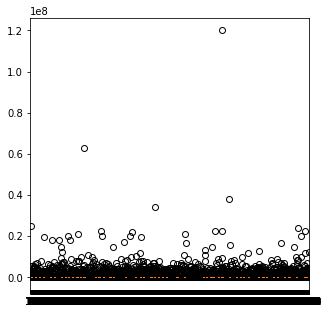

In [34]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(Home_df2_dummies)
 
# show plot
plt.show()

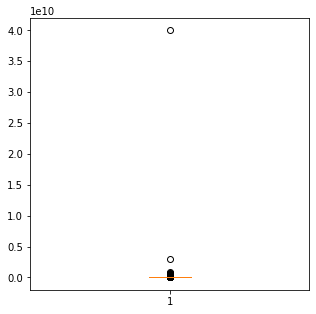

In [35]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(Home_df2_dummies['sell_price'])
 
# show plot
plt.show()

In [36]:
Home_df3 = Home_df2_dummies.loc[Home_df2_dummies['sell_price'] != max(Home_df2_dummies['sell_price'])]

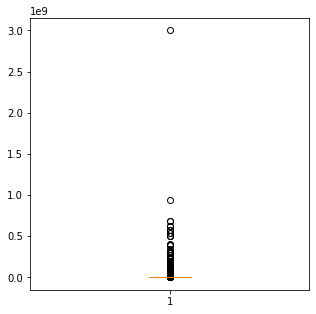

In [37]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(Home_df3['sell_price'])
 
# show plot
plt.show()

In [38]:
Home_df3 = Home_df3.loc[Home_df3['sell_price'] != max(Home_df3['sell_price'])]


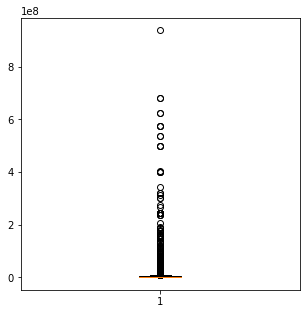

In [39]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(Home_df3['sell_price'])
 
# show plot
plt.show()

In [40]:
Home_df3 = Home_df3.loc[Home_df3['sell_price'] != max(Home_df3['sell_price'])]

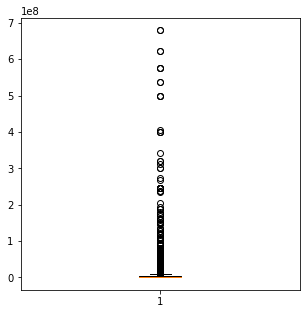

In [41]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(Home_df3['sell_price'])
 
# show plot
plt.show()

ต่อไปจัดการแก้ missing ที่เหลือ

In [42]:
Home_df3=Home_df3.dropna()

In [43]:
Home_df3.dtypes

number_of_rai                          float64
number_of_ngan                         float64
number_of_va                           float64
sell_price                             float64
number_of_story                        float64
number_of_bedroom                      float64
number_of_parking                      float64
district_บ้านนอก                         uint8
district_เมืองขอนแก่น                    uint8
property_type_คอนโด                      uint8
property_type_ทาวน์โฮม                   uint8
property_type_ที่ดิน                     uint8
property_type_บ้านเดี่ยว                 uint8
property_type_บ้านแฝด                    uint8
property_type_อาคารพาณิชย์/สำนักงาน      uint8
dtype: object

In [44]:
Home_df3.describe()

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district_บ้านนอก,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
count,1017.000000,1017.000000,1017.000000,1.017000e+03,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,0.275320,0.202557,47.578810,3.731372e+06,1.728122,2.015733,1.662734,0.190757,0.809243,0.007866,0.146509,0.006883,0.694199,0.009833,0.134710
std,2.629502,0.541827,63.220285,5.464990e+06,1.641332,1.960171,9.752312,0.393091,0.393091,0.088386,0.353790,0.082718,0.460973,0.098721,0.341581
min,0.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,1.700000e+06,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,46.600000,2.590000e+06,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,65.000000,4.100000e+06,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,67.000000,3.000000,1656.000000,1.200000e+08,36.000000,29.000000,288.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# defining feature matrix(X) and response vector(y)
X = Home_df3[['number_of_rai','number_of_ngan','number_of_va','number_of_bedroom','district_บ้านนอก','district_เมืองขอนแก่น','property_type_คอนโด','property_type_ทาวน์โฮม','property_type_ที่ดิน','property_type_บ้านเดี่ยว','property_type_บ้านแฝด','property_type_อาคารพาณิชย์/สำนักงาน']]
y = Home_df3['sell_price']

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
predictions = reg.predict(X_test) 
MSE = np.square(np.subtract(y_test,predictions)).mean()

MAE = np.absolute(np.subtract(y_test,predictions)).mean()
print(MSE,MAE)

35752721325378.02 2096967.9803973818


In [47]:
x = Home_df3[['number_of_rai','number_of_ngan','number_of_va']]
y = Home_df3['sell_price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2458353.4776313254
Coefficients: 
 [ 245692.10844339 2442392.78895536   14936.30501502]
                            OLS Regression Results                            
Dep. Variable:             sell_price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     36.84
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.35e-22
Time:                        12:25:57   Log-Likelihood:                -17168.
No. Observations:                1017   AIC:                         3.434e+04
Df Residuals:                    1013   BIC:                         3.436e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
test_df = pd.read_csv('/content/drive/MyDrive/DPDM65/test10nov_X.csv')

In [49]:
test_df

,INDEX,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,2725,10441P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2726,520.0,NaN,NaN,ขอนแก่น,ชุมแพ,ไชยสอ,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2727,6340.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,คอนโด,no,no,...,0.0,NaN,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,0.0
3,2728,17032.0,NaN,NaN,ขอนแก่น,หนองเรือ,โนนทอง,บ้านเดี่ยว,no,no,...,2.0,1.0,133.0,0.0,ตะวันออกเฉียงเหนือ,ไม่ระบุ,NaN,NaN,NaN,NaN
4,2729,18091.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,คอนโด,no,no,...,1.0,NaN,46.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2920,6040.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
196,2921,681.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,พระลับ,อาคารพาณิชย์/สำนักงาน,no,no,...,NaN,NaN,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
197,2922,1182.0,NaN,NaN,ขอนแก่น,ชุมแพ,หนองไผ่,บ้านเดี่ยว,NaN,NaN,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
198,2923,18567.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ท่าพระ,บ้านเดี่ยว,no,no,...,1.0,1.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN


In [50]:
test_df.describe()

,INDEX,land wide(m),land long(m),zip_code,longitude,number_of_rai,number_of_ngan,number_of_va,construct_year,model,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,parking_percentage
count,200.000000,28.000000,22.000000,125.000000,199.000000,200.0000,200.000000,200.000000,0.0,0.0,83.000000,144.000000,125.000000,109.000000,135.000000,1.0
mean,2824.500000,39.992857,165.690909,40055.600000,100.674884,4.9100,1.125000,48.579700,NaN,NaN,2.253012,1.736111,1.384000,4.440367,1739.602963,0.0
std,57.879185,41.863817,312.619839,91.505332,14.456416,22.0532,6.885961,80.933386,NaN,NaN,3.850383,4.811097,1.441236,28.041778,16208.466393,NaN
min,2725.000000,4.000000,8.000000,40000.000000,0.000000,0.0000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2774.750000,12.000000,20.000000,40000.000000,102.714312,0.0000,0.000000,4.875000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2824.500000,20.500000,27.750000,40000.000000,102.802889,0.0000,0.000000,32.500000,NaN,NaN,2.000000,1.000000,1.000000,0.000000,32.000000,0.0
75%,2874.250000,47.500000,145.750000,40120.000000,102.831245,0.0000,1.000000,66.000000,NaN,NaN,2.000000,3.000000,2.000000,2.000000,150.500000,0.0
max,2924.000000,150.000000,1080.000000,40320.000000,102.986023,160.0000,95.000000,780.000000,NaN,NaN,36.000000,56.000000,6.000000,288.000000,185600.000000,0.0


ข้อมูลเชิงคุณภาพของตัวทดสอบ

In [51]:
test_df1 = test_df['district']

In [52]:
test_df1[test_df1!='เมืองขอนแก่น']='บ้านนอก'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
test_df1

0      เมืองขอนแก่น
1           บ้านนอก
2      เมืองขอนแก่น
3           บ้านนอก
4      เมืองขอนแก่น
           ...     
195    เมืองขอนแก่น
196    เมืองขอนแก่น
197         บ้านนอก
198    เมืองขอนแก่น
199         บ้านนอก
Name: district, Length: 200, dtype: object

In [54]:
test_df2 = test_df['property_type']

In [55]:
test_df3 = test_df['number_of_rai']

In [56]:
test_df4 = test_df['number_of_ngan']

In [57]:
test_df5 = test_df['number_of_va']

#ข้อมูลรวมทั้งเชิงปริมาณและคุณภาพ

In [58]:
Test_df = pd.concat([test_df3,test_df4,test_df5],axis=1) #ข้อมูลรวมทั้งเชิงปริมาณและคุณภาพ

In [59]:
Test_df

,number_of_rai,number_of_ngan,number_of_va
0,9.0,3.0,5.0
1,1.0,0.0,26.0
2,0.0,0.0,32.0
3,0.0,0.0,75.0
4,0.0,0.0,0.0
...,...,...,...
195,0.0,0.0,69.0
196,0.0,0.0,20.0
197,0.0,1.0,21.0
198,0.0,0.0,83.7


In [60]:
Test_df_dummies=pd.get_dummies(Test_df)

In [61]:
Test_df_dummies

,number_of_rai,number_of_ngan,number_of_va
0,9.0,3.0,5.0
1,1.0,0.0,26.0
2,0.0,0.0,32.0
3,0.0,0.0,75.0
4,0.0,0.0,0.0
...,...,...,...
195,0.0,0.0,69.0
196,0.0,0.0,20.0
197,0.0,1.0,21.0
198,0.0,0.0,83.7


In [62]:
Test_df_dummies = sm.add_constant(Test_df_dummies) # adding a constant
predictions = model.predict(Test_df_dummies) 
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0      1.207144e+07
1      3.092390e+06
2      2.936315e+06
3      3.578576e+06
4      2.458353e+06
           ...     
195    3.488959e+06
196    2.757080e+06
197    5.214409e+06
198    3.708522e+06
199    3.205169e+06
Length: 200, dtype: float64

In [63]:
predictions.to_csv(index=False)

'0\n12071442.345562898\n3092389.5164651955\n2936315.2381119314\n3578576.3537577786\n2458353.4776313007\n2458353.4776313007\n3354531.778532483\n3937047.6741182515\n2458353.4776313007\n3653257.878832877\n5053096.577739855\n2458353.4776313007\n2816824.7979917736\n5647561.517337639\n4990364.096676772\n11204480.82092423\n5161374.680045056\n3698066.7938779364\n3294786.5584724043\n9155629.341953572\n3279850.2534573846\n3175296.1183522465\n3399340.693577542\n7343139.055542006\n3713003.098892956\n2458353.4776313007\n2458353.4776313007\n3220105.0333973058\n12518017.647404604\n2458353.4776313007\n2458353.4776313007\n2458353.4776313007\n11122024.224341992\n5423516.942112343\n2458353.4776313007\n6580323.656471929\n3375442.6055535106\n6129206.808803566\n3055805.6782320887\n2731687.859406161\n2458353.4776313007\n3136461.7253131955\n3040869.3732170695\n42934122.61974402\n14805441.99707903\n4900746.266586654\n3414276.998592562\n5602752.6022925805\n2786952.1879617344\n2458353.4776313007\n11038667.617150

In [64]:
predictions.describe()

count    2.000000e+02
mean     7.137995e+06
std      1.849797e+07
min      2.458353e+06
25%      2.813091e+06
50%      3.571108e+06
75%      5.648759e+06
max      2.463817e+08
dtype: float64

In [65]:
finaltest_df = pd.read_csv('/content/drive/MyDrive/DPDM65/finaltest_X.csv')

In [66]:
finaltest_df

,INDEX,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,2925,21082.0,NaN,NaN,ขอนแก่น,บ้านไผ่,หินตั้ง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,2926,30237P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,NaN,บ้านเดี่ยว,NaN,NaN,...,NaN,18-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2927,18099.0,NaN,NaN,ขอนแก่น,บ้านไผ่,ในเมือง,อาคารพาณิชย์/สำนักงาน,no,no,...,2.0,1.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
3,2928,1713.0,NaN,NaN,ขอนแก่น,อุบลรัตน์,บ้านดง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
4,2929,3056P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,สำราญ,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3720,18702.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,อาคารพาณิชย์/สำนักงาน,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
796,3721,30128P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,NaN,บ้านเดี่ยว,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,3722,18422.0,NaN,NaN,ขอนแก่น,เขาสวนกวาง,เขาสวนกวาง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
798,3723,2283.0,NaN,NaN,ขอนแก่น,ชุมแพ,ชุมแพ,บ้านเดี่ยว,no,no,...,0.0,0.0,680.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


In [70]:
finaltest_df.describe()

,INDEX,land wide(m),zip_code,number_of_rai,number_of_ngan,number_of_va,construct_year,model,number_of_bedroom,number_of_bathroom,floor_number,parking_percentage
count,800.0000,97.000000,515.000000,800.000000,800.000000,800.000000,0.0,0.0,553.000000,477.000000,123.000000,1.0
mean,3324.5000,48.348351,39999.871845,3.047500,0.580000,44.837113,NaN,NaN,1.522604,1.406709,2.577236,0.0
std,231.0844,75.775884,2725.204418,12.473862,1.440901,82.498482,NaN,NaN,2.336683,1.512621,6.282957,NaN
min,2925.0000,4.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0
25%,3124.7500,10.400000,40000.000000,0.000000,0.000000,3.300000,NaN,NaN,0.000000,0.000000,0.000000,0.0
50%,3324.5000,21.000000,40000.000000,0.000000,0.000000,32.000000,NaN,NaN,1.000000,1.000000,0.000000,0.0
75%,3524.2500,56.000000,40130.000000,0.000000,1.000000,66.000000,NaN,NaN,3.000000,2.000000,2.000000,0.0
max,3724.0000,593.000000,77120.000000,201.000000,24.000000,2000.000000,NaN,NaN,40.000000,13.000000,33.000000,0.0


In [69]:
finaltest_df3 = finaltest_df['number_of_rai']

In [71]:
finaltest_df4 = finaltest_df['number_of_ngan']

In [72]:
finaltest_df5 = finaltest_df['number_of_va']

In [73]:
Finaltest_df = pd.concat([finaltest_df3,finaltest_df4,finaltest_df5],axis=1)

In [74]:
Finaltest_df = sm.add_constant(Finaltest_df) # adding a constant
predictions = model.predict(Finaltest_df) 
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0      8.094744e+06
1      5.296251e+06
2      2.876570e+06
3      1.375622e+07
4      2.704046e+06
           ...     
795    3.668194e+06
796    2.458353e+06
797    9.793000e+06
798    7.439918e+06
799    2.772016e+06
Length: 800, dtype: float64

In [75]:
predictions.describe()

count    8.000000e+02
mean     5.293389e+06
std      5.392337e+06
min      2.458353e+06
25%      2.831761e+06
50%      3.473275e+06
75%      5.767042e+06
max      8.240728e+07
dtype: float64

In [76]:
predictions.to_csv(index=False)

'0\n8094743.676350625\n5296251.430485046\n2876570.0180518525\n13756217.115042355\n2704045.586074683\n17071218.81353537\n6971943.1083111875\n2458353.4776313007\n2772015.8829467148\n7446877.171574047\n2458353.4776313007\n11899735.492212322\n4915682.571601674\n3354531.778532483\n2458353.4776313007\n2786952.1879617344\n6319695.243013526\n3294786.5584724043\n2816824.7979917736\n3429213.3036075816\n2458353.4776313007\n14251574.682913655\n2458353.4776313007\n3951983.9791332716\n9129480.699123595\n4900746.266586654\n2458353.4776313007\n5299545.61048768\n2458353.4776313007\n9829116.730932772\n3152134.7365252743\n3085678.2882621284\n3354531.778532483\n2772015.8829467148\n3491945.7846706645\n3279850.2534573846\n10756391.670473639\n2939302.4991149353\n11279162.345999328\n3391115.6167655895\n8657533.89686374\n3220105.0333973058\n2458353.4776313007\n2757079.5779316947\n9157879.896759517\n2949737.6945180655\n3309722.863487424\n3503894.82868268\n4975427.791661752\n3860872.5185416513\n3354531.778532483